In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [2]:
df = pd.read_csv("Final_Clean2.csv")
df

,Unnamed: 0,diagnosis,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins,perimeter_mean_bins,area_worst_bins,radius_mean_bins,area_mean_bins
0,0,1,D,D,D,D,D,D,D,D
1,1,1,D,D,C,D,D,D,D,D
2,2,1,D,D,D,D,D,D,D,D
3,3,1,D,C,D,B,B,B,A,A
4,4,1,D,D,D,D,D,D,D,D
...,...,...,...,...,...,...,...,...,...,...
564,564,1,D,D,D,D,D,D,D,D
565,565,1,D,D,D,D,D,D,D,D
566,566,1,C,D,C,C,D,D,D,D
567,567,1,D,D,D,D,D,D,D,D


In [3]:
df2 = df.drop(columns=['Unnamed: 0'])
df2

,diagnosis,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins,perimeter_mean_bins,area_worst_bins,radius_mean_bins,area_mean_bins
0,1,D,D,D,D,D,D,D,D
1,1,D,D,C,D,D,D,D,D
2,1,D,D,D,D,D,D,D,D
3,1,D,C,D,B,B,B,A,A
4,1,D,D,D,D,D,D,D,D
...,...,...,...,...,...,...,...,...,...
564,1,D,D,D,D,D,D,D,D
565,1,D,D,D,D,D,D,D,D
566,1,C,D,C,C,D,D,D,D
567,1,D,D,D,D,D,D,D,D


In [4]:
df2.columns

Index(['diagnosis', 'concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins', 'perimeter_mean_bins',
       'area_worst_bins', 'radius_mean_bins', 'area_mean_bins'],
      dtype='object')

In [5]:
df_sub= pd.DataFrame(df2.diagnosis)
df_sub

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [22]:
# get dums
dums_linear = pd.get_dummies(df2.loc[:, ['concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins','perimeter_mean_bins',
       'area_worst_bins', 'radius_mean_bins', 'area_mean_bins']], drop_first=True)
dums_other = pd.get_dummies(df2.loc[:, ['concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins','perimeter_mean_bins',
       'area_worst_bins', 'radius_mean_bins', 'area_mean_bins']], drop_first=False)
#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)


df_sub_linear2= df_sub_linear.drop(columns=['diagnosis'])
df_sub_linear2.head()

,concave_points_worst_bins_B,concave_points_worst_bins_C,concave_points_worst_bins_D,perimeter_worst_bins_B,perimeter_worst_bins_C,perimeter_worst_bins_D,concave_points_mean_bins_B,concave_points_mean_bins_C,concave_points_mean_bins_D,radius_worst_bins_B,radius_worst_bins_C,radius_worst_bins_D,perimeter_mean_bins_B,perimeter_mean_bins_C,perimeter_mean_bins_D,area_worst_bins_B,area_worst_bins_C,area_worst_bins_D,radius_mean_bins_B,radius_mean_bins_C,radius_mean_bins_D,area_mean_bins_B,area_mean_bins_C,area_mean_bins_D
0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [7]:
# get pandas columns for prediction
target = df_sub_linear["diagnosis"]
features = df_sub_linear.drop(["diagnosis"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       285
           1       0.99      0.86      0.92       170

    accuracy                           0.95       455
   macro avg       0.96      0.93      0.94       455
weighted avg       0.95      0.95      0.94       455


Confusion Matrix - In Sample
[[283   2]
 [ 23 147]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114


Confusion Matrix - Out Sample
[[70  2]
 [ 8 34]]


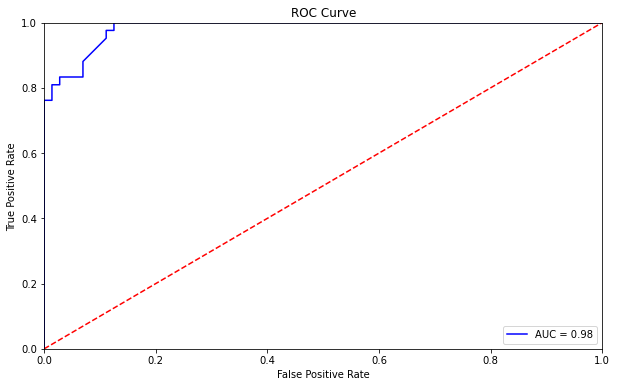

In [8]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
import pickle

In [10]:
#save the model to disk
filename = 'finalized_model100.sav'
pickle.dump(reg, open(filename, 'wb'))

In [11]:
content = {'concave_points_worst_bins':"A",
'perimeter_worst_bins':"B", 'concave_points_mean_bins':"C",
'radius_worst_bins':"D",
'perimeter_mean':"A", 'area_worst':"B", 'radius_mean':"C", 'area_mean':"D"}

In [12]:
content

{'concave_points_worst_bins': 'A',
 'perimeter_worst_bins': 'B',
 'concave_points_mean_bins': 'C',
 'radius_worst_bins': 'D',
 'perimeter_mean': 'A',
 'area_worst': 'B',
 'radius_mean': 'C',
 'area_mean': 'D'}

In [13]:
# parse
concave_points_worst_bins = content["concave_points_worst_bins"]
perimeter_worst_bins = content["perimeter_worst_bins"]
concave_points_mean_bins = content["concave_points_mean_bins"]
radius_worst_bins = content["radius_worst_bins"]
perimeter_mean_bins = content["perimeter_mean"]
area_worst_bins = content["area_worst"]
radius_mean_bins = content["radius_mean"]
area_mean_bins = content["area_mean"]

In [14]:
concave_points_worst_bins_A=0
concave_points_worst_bins_B=0
concave_points_worst_bins_C=0
concave_points_worst_bins_D=0

perimeter_worst_bins_A=0
perimeter_worst_bins_B=0
perimeter_worst_bins_C=0
perimeter_worst_bins_D=0

concave_points_mean_bins_A=0
concave_points_mean_bins_B=0
concave_points_mean_bins_C=0
concave_points_mean_bins_D=0

radius_worst_bins_A=0
radius_worst_bins_B=0 
radius_worst_bins_C=0
radius_worst_bins_D=0

perimeter_mean_bins_A=0
perimeter_mean_bins_B=0
perimeter_mean_bins_C=0
perimeter_mean_bins_D=0

area_worst_bins_A=0
area_worst_bins_B=0
area_worst_bins_C=0
area_worst_bins_D=0

radius_mean_bins_A=0
radius_mean_bins_B=0
radius_mean_bins_C=0
radius_mean_bins_D=0

area_mean_bins_A=0
area_mean_bins_B=0
area_mean_bins_C=0
area_mean_bins_D=0

In [15]:
 # parse pclass
if (concave_points_worst_bins == "A"):
     concave_points_worst_bins_A = 1
if (concave_points_worst_bins == "B"):
    concave_points_worst_bins_B = 1
elif (concave_points_worst_bins == "C"):
    concave_points_worst_bins_C = 1
elif (concave_points_worst_bins == "D"):
    concave_points_worst_bins_D = 1
else:
    pass

# parse embarked
if (perimeter_worst_bins == "A"):
    perimeter_worst_bins_A = 1
if (perimeter_worst_bins == "B"):
    perimeter_worst_bins_B = 1
elif (perimeter_worst_bins == "C"):
    perimeter_worst_bins_C = 1
elif (perimeter_worst_bins == "D"):
    perimeter_worst_bins_D = 1
else:
    pass

if (concave_points_mean_bins == "A"):
    concave_points_mean_bins_A = 1
if (concave_points_mean_bins == "B"):
    concave_points_mean_bins_B = 1
elif (concave_points_mean_bins == "C"):
    concave_points_mean_bins_C = 1
elif (concave_points_mean_bins == "D"):
    concave_points_mean_bins_D = 1
else:
    pass

if (radius_worst_bins == "A"):
    radius_worst_bins_A = 1
if (radius_worst_bins == "B"):
    radius_worst_bins_B = 1
elif (radius_worst_bins == "C"):
    radius_worst_bins_C = 1
elif (radius_worst_bins == "D"):
    radius_worst_bins_D = 1
else:
    pass

 # parse pclass
if (perimeter_mean_bins == "A"):
     perimeter_mean_bins_A = 1
if (perimeter_mean_bins == "B"):
    perimeter_mean_bins_B = 1
elif (perimeter_mean_bins == "C"):
    perimeter_mean_bins_C = 1
elif (perimeter_mean_bins == "D"):
    perimeter_mean_bins_D = 1
else:
    pass

# parse embarked
if (area_worst_bins == "A"):
    area_worst_bins_A = 1
if (area_worst_bins == "B"):
    area_worst_bins_B = 1
elif (area_worst_bins == "C"):
    area_worst_bins_C = 1
elif (area_worst_bins == "D"):
    area_worst_bins_D = 1
else:
    pass

if (radius_mean_bins == "A"):
    radius_mean_bins_A = 1
if (radius_mean_bins == "B"):
    radius_mean_bins_B = 1
elif (radius_mean_bins == "C"):
    radius_mean_bins_C = 1
elif (radius_mean_bins == "D"):
    radius_mean_bins_D = 1
else:
    pass

if (area_mean_bins == "A"):
    area_mean_bins_A = 1
if (area_mean_bins == "B"):
    area_mean_bins_B = 1
elif (area_mean_bins == "C"):
    area_mean_bins_C = 1
elif (area_mean_bins == "D"):
    area_mean_bins_D = 1
else:
    pass

In [16]:
df_sub_linear.columns

Index(['diagnosis', 'concave_points_worst_bins_B',
       'concave_points_worst_bins_C', 'concave_points_worst_bins_D',
       'perimeter_worst_bins_B', 'perimeter_worst_bins_C',
       'perimeter_worst_bins_D', 'concave_points_mean_bins_B',
       'concave_points_mean_bins_C', 'concave_points_mean_bins_D',
       'radius_worst_bins_B', 'radius_worst_bins_C', 'radius_worst_bins_D',
       'perimeter_mean_bins_B', 'perimeter_mean_bins_C',
       'perimeter_mean_bins_D', 'area_worst_bins_B', 'area_worst_bins_C',
       'area_worst_bins_D', 'radius_mean_bins_B', 'radius_mean_bins_C',
       'radius_mean_bins_D', 'area_mean_bins_B', 'area_mean_bins_C',
       'area_mean_bins_D'],
      dtype='object')

In [18]:
input_pred = [[concave_points_worst_bins_B,concave_points_worst_bins_C, concave_points_worst_bins_D, perimeter_worst_bins_B, perimeter_worst_bins_C,perimeter_worst_bins_D, concave_points_mean_bins_B,concave_points_mean_bins_C, concave_points_mean_bins_D,radius_worst_bins_B, radius_worst_bins_C, radius_worst_bins_D,perimeter_mean_bins_B, perimeter_mean_bins_C,perimeter_mean_bins_D, area_worst_bins_B, area_worst_bins_C,area_worst_bins_D, radius_mean_bins_B, radius_mean_bins_C,radius_mean_bins_D, area_mean_bins_B, area_mean_bins_C,area_mean_bins_D]]


In [19]:
input_pred

[[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]]

In [23]:
pd.DataFrame(input_pred, columns=df_sub_linear2.columns)

,concave_points_worst_bins_B,concave_points_worst_bins_C,concave_points_worst_bins_D,perimeter_worst_bins_B,perimeter_worst_bins_C,perimeter_worst_bins_D,concave_points_mean_bins_B,concave_points_mean_bins_C,concave_points_mean_bins_D,radius_worst_bins_B,radius_worst_bins_C,radius_worst_bins_D,perimeter_mean_bins_B,perimeter_mean_bins_C,perimeter_mean_bins_D,area_worst_bins_B,area_worst_bins_C,area_worst_bins_D,radius_mean_bins_B,radius_mean_bins_C,radius_mean_bins_D,area_mean_bins_B,area_mean_bins_C,area_mean_bins_D
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [24]:
filename = 'finalized_model100.sav'
reg_load = pickle.load(open(filename, 'rb'))

In [25]:
X = np.array(input_pred)
preds = reg_load.predict_proba(X)
preds_singular = reg_load.predict(X)

In [26]:
preds

array([[0.88127133, 0.11872867]])

In [27]:
preds_singular

array([0], dtype=int64)